# Amazon Revenue Performance & Customer Behavior Analysis

### Project Objective
This project analyzes 50,000 amazon transactions to understand mainly the following :

 *Revenue performance  
 
 *Customer purchasing behaviour
 
 *Discount effectiveness 
 
 *Regional trends

The goal is to extract actionable buisiness insights that support pricing statergy, category management and revenue optimization.

### 1.	Data Loading and Initial Overview

Import all necessary libraries 

 *Pandas-Data manipulation
 
 *Numpy-Numerical operations
 
 *Matplotlib & Seaborn-Visualization

In [44]:
#Data manipulation
import  pandas as pd

#Numerical operation
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [45]:
df=pd.read_csv("amazon_sales_dataset.csv")       

# This step imports dataset into pandas dataframe allowing structed analysis of 50,000 transaction records.

In [25]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.50,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.70,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.40,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.00,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.60,308,201.68,806.72


In [5]:
df.tail()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
49995,49996,2022-09-03,1433,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95
49996,49997,2022-07-03,1428,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05
49997,49998,2023-02-17,4651,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92
49998,49999,2022-09-30,4371,Beauty,307.54,5,1,Middle East,UPI,1.8,316,292.16,292.16
49999,50000,2023-06-29,2944,Home & Kitchen,253.44,30,1,Europe,Debit Card,2.1,464,177.41,177.41


In [ ]:
# df.head() and df.tail() helps in 
* Underatnding column structure
* Verifying data loading
* Identifying data types visually

Data overview

In [6]:
# Shape of dataset
df.shape

(50000, 13)

This confirms dataset size and structure 
which is 50,000 rows(transactions) and 13 columns(features)

In [7]:
# Data types
df.dtypes

order_id              int64
order_date           object
product_id            int64
product_category     object
price               float64
discount_percent      int64
quantity_sold         int64
customer_region      object
payment_method       object
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

In [ ]:
This step describes the datatype of each column 

In [8]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


This step showcase data consistency, missing values if any, data types.
from this we can understand the datatype of order date is object which has to be converted to datetime.

In [23]:
#Statistical summary
df.describe()

,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,25000.50,2986.85,252.51,13.34,3.00,3.00,249.33,218.89,657.33
std,14433.90,1156.37,143.03,9.85,1.42,1.15,144.25,127.32,526.22
min,1.00,1000.00,5.01,0.00,1.00,1.00,0.00,3.53,3.84
25%,12500.75,1983.00,127.84,5.00,2.00,2.00,125.00,109.68,240.32
50%,25000.50,2983.00,252.97,10.00,3.00,3.00,250.00,215.81,505.41
75%,37500.25,3989.00,376.33,20.00,4.00,4.00,374.00,322.70,968.97
max,50000.00,4999.00,499.99,30.00,5.00,5.00,499.00,499.91,2499.55


The purpose of this step is 
* To understand distribution of numerical features
* Identify maximum , minimum and mean values
* Detect potential outliers


#### Observation 
* Dataset contains 50,000 records and multiple numeric features
* No major datatype inconsistencies were observed
* Key revenue-driving columns include:
  
         *price
         *discount_percent
         *quantity_sold
         *rating
         *total_revenue


### 2.	Data Pre-processing

In [9]:
# Missing Values

df.isnull().sum()

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

This step hepls to analyse missing values 

In [9]:
#Duplicate removal

df.duplicated().sum()

np.int64(0)

This step shows if any duplicates are present 

In [46]:
# Data type correction

df['order_date']=pd.to_datetime(df['order_date'])

As per previous observation the data type of order date has to be changed from object to datetime.

In [47]:
#Derived Column

#Extract date features
df['Year']=df['order_date'].dt.year
df['Month']=df['order_date'].dt.month
df['Month_name']=df['order_date'].dt.month_name()
df['Quarter']=df['order_date'].dt.quarter




In [48]:
#Revenue before discount
df['revenue_before_discount']=df['price']*df['quantity_sold']

#Discount amount per unit
df['discount_amount']=df['price']-df['discounted_price']

#Revenue loss due to discount
df['revenue_loss_todiscount']=df['revenue_before_discount']-df['total_revenue']

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 50000 non-null  int64         
 1   order_date               50000 non-null  datetime64[ns]
 2   product_id               50000 non-null  int64         
 3   product_category         50000 non-null  object        
 4   price                    50000 non-null  float64       
 5   discount_percent         50000 non-null  int64         
 6   quantity_sold            50000 non-null  int64         
 7   customer_region          50000 non-null  object        
 8   payment_method           50000 non-null  object        
 9   rating                   50000 non-null  float64       
 10  review_count             50000 non-null  int64         
 11  discounted_price         50000 non-null  float64       
 12  total_revenue            50000 n

#### Observations

* No significant missing values were found
* Ensured dataset is clean and analysis ready
* Added caluclated columns as per the buisness logic

### 3.	Exploratory Data Analysis (EDA)

Univariate Analysis
Analayse the distribution of individual variables 

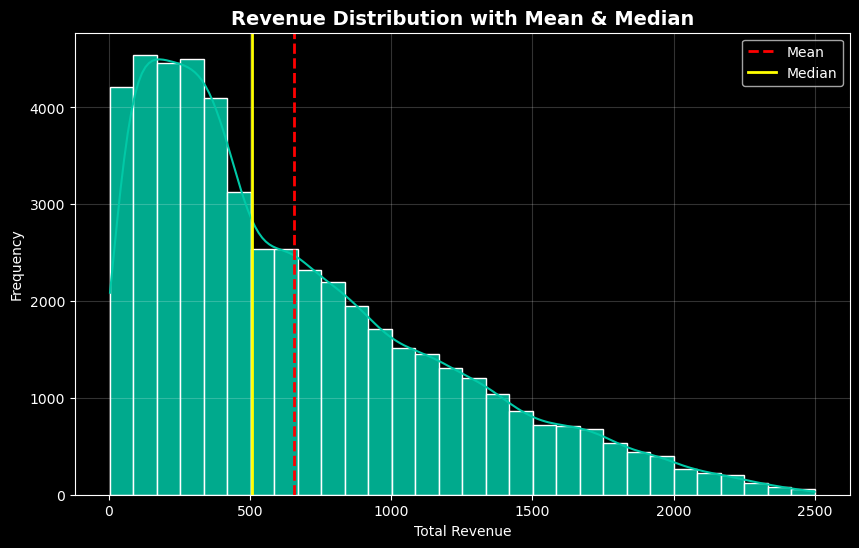

In [49]:
#Revenue distribution with mean and median

plt.style.use('dark_background')
plt.figure(figsize=(10,6), dpi=100)
sns.histplot( df['total_revenue'], bins=30, kde=True, color='#00C9A7', edgecolor='white', alpha=0.85)
mean_val = df['total_revenue'].mean() #657.3314748
median_val = df['total_revenue'].median() #505.40999999999997
# Add mean & median lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(median_val, color='yellow', linestyle='-', linewidth=2, label='Median')
plt.title("Revenue Distribution with Mean & Median", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

Observation:
Revenue is positively skewed,indicating presence of high-value trancations

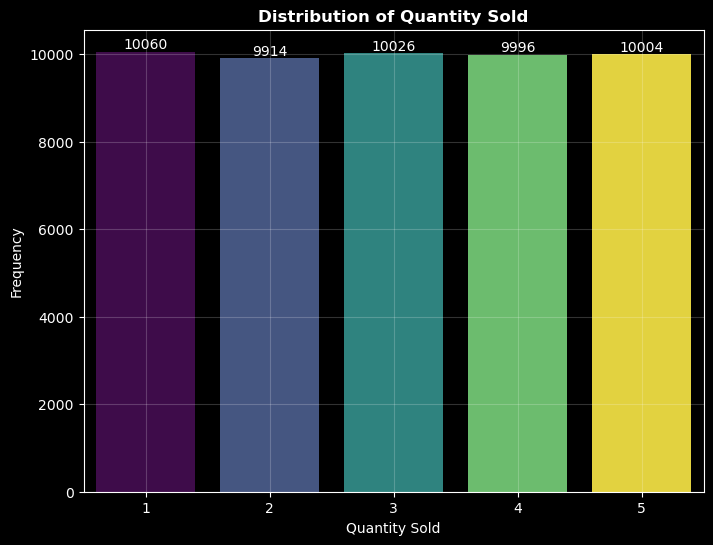

In [50]:
#Distribution of quantity sold

plt.style.use('dark_background')
plt.figure(figsize=(8,6), dpi=100)
ax = sns.countplot(data=df,x="quantity_sold", hue="quantity_sold",palette="viridis", legend=False)
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='white'
    )
plt.title("Distribution of Quantity Sold", fontweight='bold')
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

Observation:
The distribution of quantity sold  appears uniform

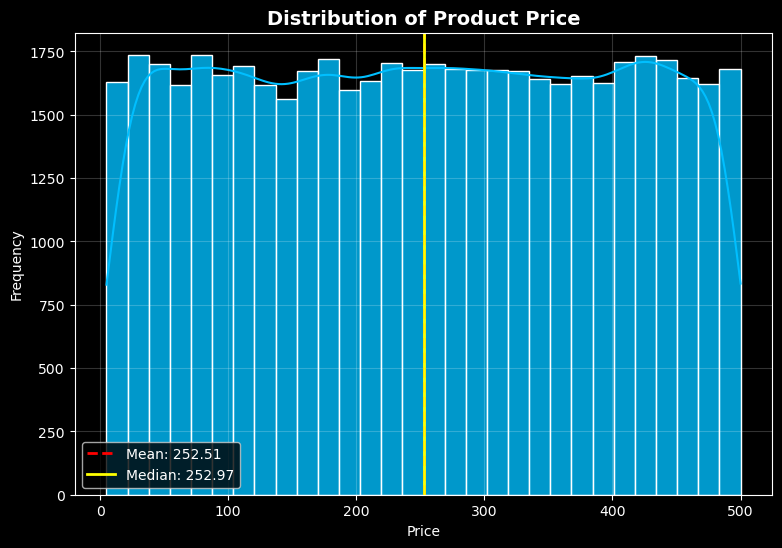

In [9]:
#Price distribution

plt.style.use('dark_background')
plt.figure(figsize=(9,6), dpi=100)
ax = sns.histplot(df['price'],bins=30,kde=True,color='#00BFFF',edgecolor='white',alpha=0.8)
mean_price = df['price'].mean()
median_price = df['price'].median()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_price:.2f}")
plt.axvline(median_price, color='yellow', linestyle='-', linewidth=2, label=f"Median: {median_price:.2f}")
plt.title("Distribution of Product Price", fontsize=14, fontweight='bold')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

Observation:
The distribuition is symmetric 
No strong skewness
Prices are evenly spread across the range 

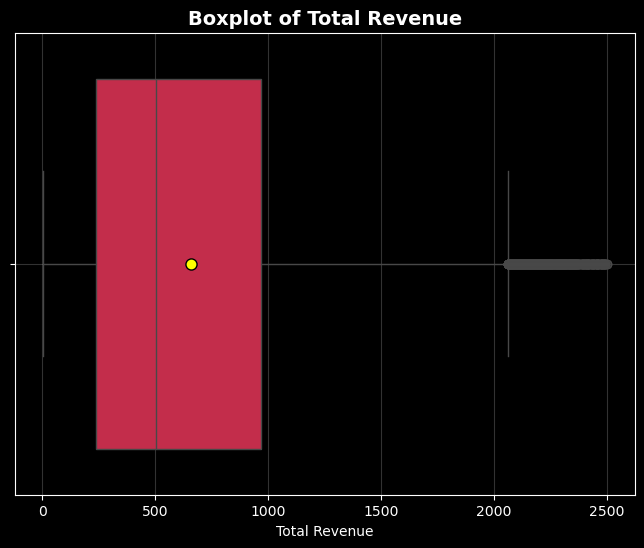

In [51]:
#Boxplot for Revenue

plt.style.use('dark_background')
plt.figure(figsize=(8,6), dpi=100)
sns.boxplot(
    x=df['total_revenue'],
    color='crimson',
    showmeans=True,
    meanprops={
        "marker":"o",
        "markerfacecolor":"yellow",
        "markeredgecolor":"black",
        "markersize":"8"
    }
)

plt.title('Boxplot of Total Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue')

plt.grid(alpha=0.2)
plt.show()

Observation:
Revenue values are within a normal range
No unusually transcations small or large 
Data is well  distributed


In [52]:
#KPI Summary

total_revenue = df['total_revenue'].sum()
total_orders = df.shape[0]
total_quantity = df['quantity_sold'].sum()
avg_order_value = df['total_revenue'].mean()
avg_price = df['price'].mean()
avg_discount = df['discount_percent'].mean()

kpi_summary = pd.DataFrame({
    "KPI": [
        "Total Revenue",
        "Total Orders",
        "Total Quantity Sold",
        "Average Order Value",
        "Average Price",
        "Average Discount"
    ],
    "Value": [
        total_revenue,
        total_orders,
        total_quantity,
        round(avg_order_value,2),
        round(avg_price,2),
        round(avg_discount,2)
    ]
})

kpi_summary

,KPI,Value
0,Total Revenue,32866573.74
1,Total Orders,50000.00
2,Total Quantity Sold,149970.00
3,Average Order Value,657.33
4,Average Price,252.51
5,Average Discount,13.34


Bivariate analysis
Analyse relationship between two variables

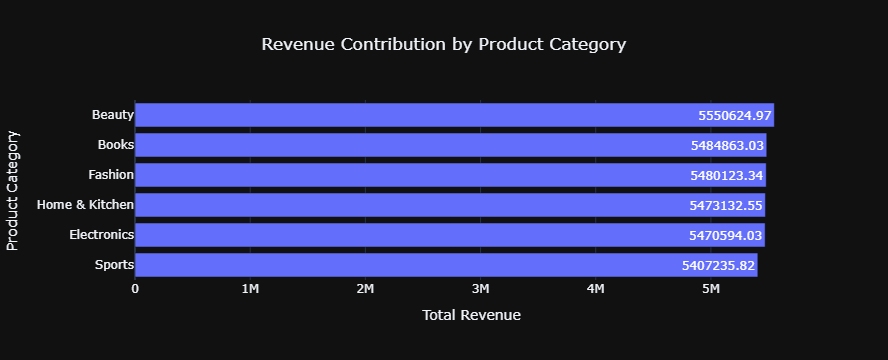

In [53]:
# Revenue by product category(Groupby)

product_revenue = (
    df.groupby('product_category')['total_revenue']
    .sum()
    .sort_values(ascending=True)
    .reset_index()
)

fig = px.bar(
    product_revenue,
    x='total_revenue',
    y='product_category',
    orientation='h',
    text='total_revenue',
    title="Revenue Contribution by Product Category"
)

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    xaxis_title="Total Revenue",
    yaxis_title="Product Category"
)

fig.show()

Observation:
Revenue is balanced accross different categories
Business is not depended on one product 
Balanced sales performance


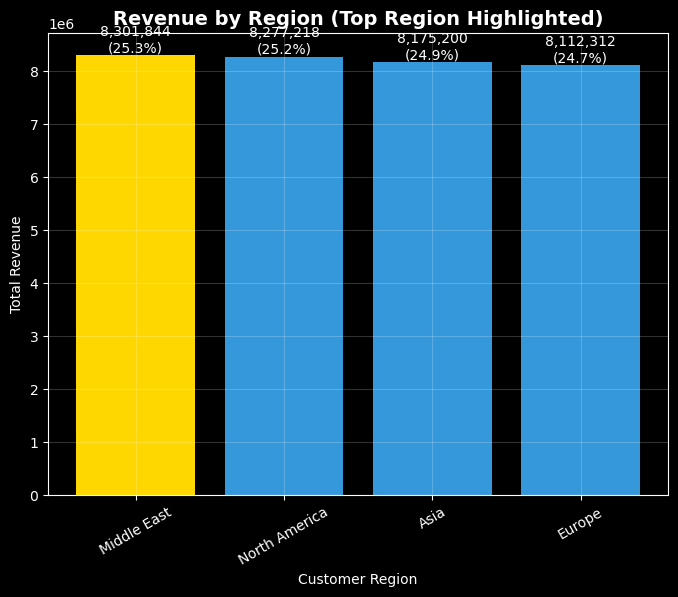

In [55]:
#Revenue by region

region_revenue = (
    df.groupby("customer_region")["total_revenue"]
    .sum()
    .sort_values(ascending=False)
)

plt.style.use('dark_background')
plt.figure(figsize=(8,6), dpi=100)

colors = ['#FFD700' if i == region_revenue.idxmax() else '#3498DB' 
          for i in region_revenue.index]

bars = plt.bar(region_revenue.index, region_revenue.values, color=colors)

total = region_revenue.sum()

for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:,.0f}\n({percent:.1f}%)",
        ha='center',
        va='bottom',
        color='white',
        fontsize=10
    )

plt.title("Revenue by Region (Top Region Highlighted)", 
          fontsize=14, fontweight='bold')
plt.xlabel("Customer Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=30)
plt.grid(alpha=0.2)
plt.show()

Observation:
No single region dominates
Business presence is geographically uniform and stable
Revenue distribution across regions appears relatively balanced, suggesting diversified market strength


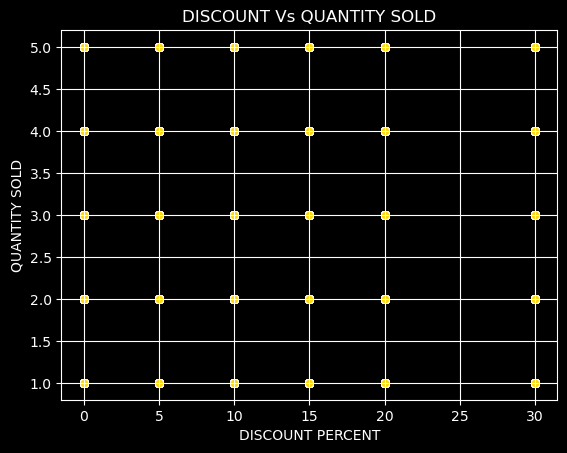

In [56]:
#Discount vs Quantity sold
plt.style.use('dark_background')
sns.scatterplot(x='discount_percent',y='quantity_sold',data=df,color="gold")
plt.title("DISCOUNT Vs QUANTITY SOLD")
plt.grid(True)
plt.xlabel("DISCOUNT PERCENT")
plt.ylabel("QUANTITY SOLD")
plt.show()

Observation:
No strong linear relationship
Discount% doesnot significantly influence quantity sold 

Multivariate analysis
Analyze interaction between multiple variables

In [68]:
# Pivot table-revenue by category and region

pivot_table=pd.pivot_table(
    df,
    values='total_revenue',
    index='product_category',
    columns='customer_region',
    aggfunc='sum'
)
pivot_table

customer_region,Asia,Europe,Middle East,North America
product_category,,,,
Beauty,1401916.92,1358226.42,1387711.96,1402769.67
Books,1391961.69,1330671.45,1428560.07,1333669.82
Electronics,1319074.46,1407118.94,1379642.77,1364757.86
Fashion,1334485.23,1366107.00,1390228.60,1389302.51
Home & Kitchen,1369676.45,1326424.56,1375546.52,1401485.02
Sports,1358085.08,1323763.20,1340154.58,1385232.96


Observation:
   No single region dominates
   No category is region-dependent
   Business performance is geographically stable
   Revenue risk is diversified

In [19]:
#Correlation Analysis

corr=df[['price','discount_percent','quantity_sold',
         'total_revenue','rating','review_count']].corr()
corr

,price,discount_percent,quantity_sold,total_revenue,rating,review_count
price,1.000000,-0.004654,0.004405,0.711094,0.006386,0.001282
discount_percent,-0.004654,1.000000,0.001399,-0.144392,0.003715,0.005193
quantity_sold,0.004405,0.001399,1.000000,0.594404,-0.002879,0.000717
total_revenue,0.711094,-0.144392,0.594404,1.000000,0.001804,0.002208
rating,0.006386,0.003715,-0.002879,0.001804,1.000000,-0.002895
review_count,0.001282,0.005193,0.000717,0.002208,-0.002895,1.000000


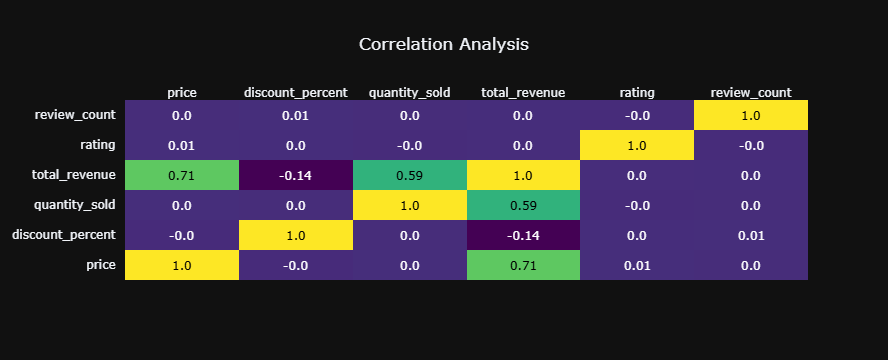

In [20]:


fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    colorscale='Viridis'
)

fig.update_layout(
    title="Correlation Analysis",
    template="plotly_dark",
    title_x=0.5
)

fig.show()

Observations:
total_revenue shows a strong positive correlation(0.71) with price
totl_revenue has a moderate positve relationship(0.59) with quantity_sold
discount_percent has a weak negative correlation(-0.14) with revenue
discount_percent shows negligible coorelation with quanity sold

### 4.	Visualizations


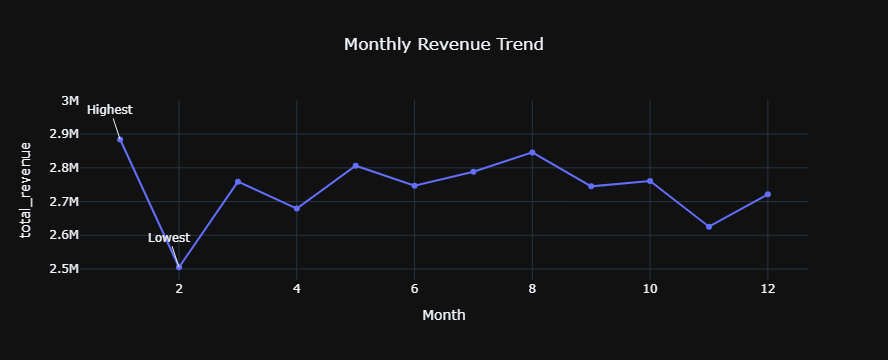

In [40]:
#line chart(time trend)

#monthly revenue trend

monthly_revenue = (
    df.groupby('Month')['total_revenue']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_revenue,
    x='Month',
    y='total_revenue',
    markers=True,
    title="Monthly Revenue Trend"
)

max_row = monthly_revenue.loc[monthly_revenue['total_revenue'].idxmax()]
min_row = monthly_revenue.loc[monthly_revenue['total_revenue'].idxmin()]

fig.add_annotation(x=max_row['Month'], y=max_row['total_revenue'],
                   text="Highest", showarrow=True)

fig.add_annotation(x=min_row['Month'], y=min_row['total_revenue'],
                   text="Lowest", showarrow=True)

fig.update_layout(template="plotly_dark", title_x=0.5)

fig.show()

Observation:
Revenue varies month to month 
Alternate peaks and dips rather than consistent upward or downward pattern 

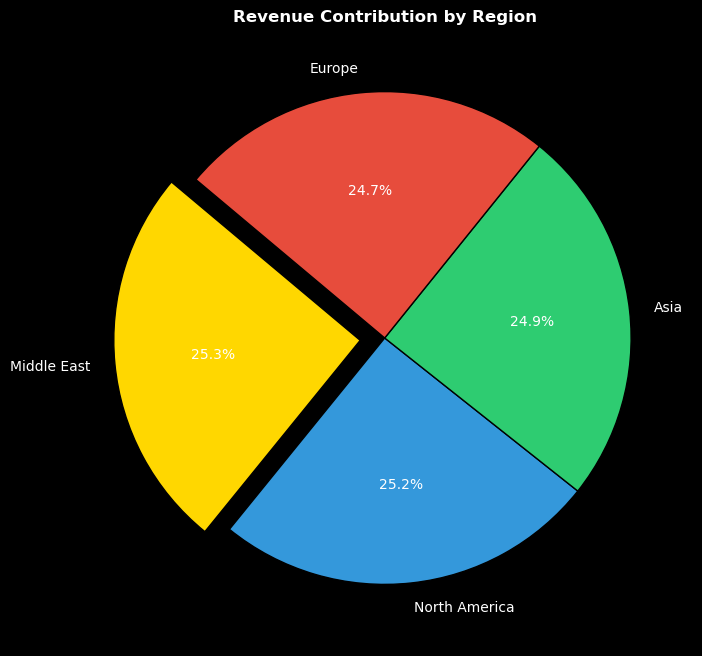

In [41]:
#Pie chart

# revenue share by region
plt.style.use('dark_background')
plt.figure(figsize=(8,8), dpi=100)

region_revenue = region_revenue.sort_values(ascending=False)

explode = [0.1] + [0]*(len(region_revenue)-1)

colors = ['#FFD700', '#3498DB', '#2ECC71', '#E74C3C']

plt.pie(
    region_revenue,
    labels=region_revenue.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    wedgeprops={'edgecolor':'black'}
)

plt.title("Revenue Contribution by Region", fontweight='bold')
plt.show()

In [ ]:
Observation:
No single  dominant region contributing significantly higher revenue 

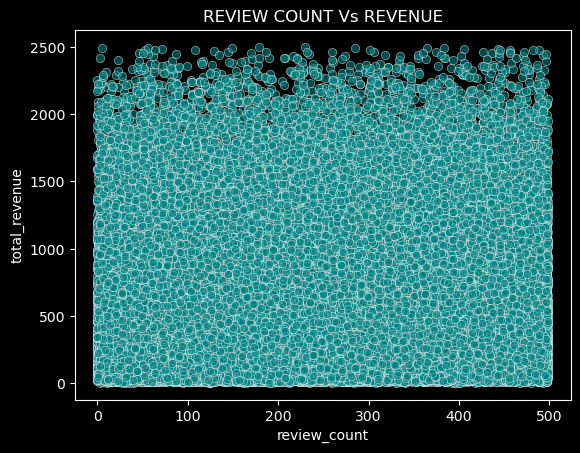

In [42]:
#Scatter plot

sns.scatterplot(x='review_count',y='total_revenue',data=df,color='teal',alpha=0.6)
plt.title("REVIEW COUNT Vs REVENUE")
plt.show()

Observations:
Points are clustered tighly 
No clear upward or downward pattern

In [34]:
#Discount summary

discount_summary = pd.DataFrame({
    "Metric": ["Revenue Before Discount", "Actual Revenue"],
    "Amount": [
        df['revenue_before_discount'].sum(),
        df['total_revenue'].sum()
    ]
})

discount_summary

,Metric,Amount
0,Revenue Before Discount,37913104.54
1,Actual Revenue,32866573.74


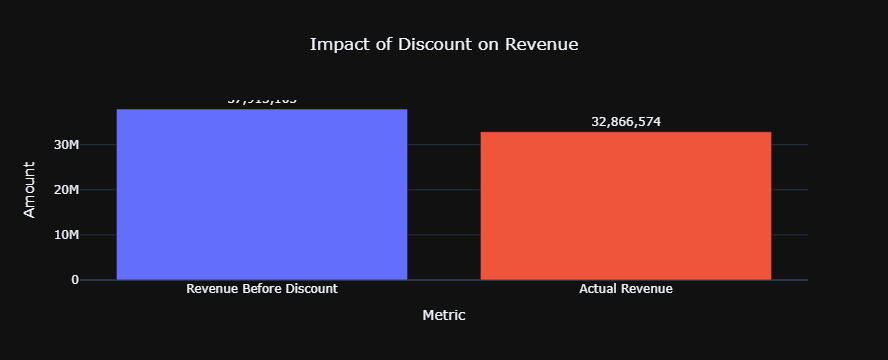

In [43]:
# Impact of disount on Revenue
fig = px.bar(
    discount_summary,
    x="Metric",
    y="Amount",
    text="Amount",
    color="Metric",
    title="Impact of Discount on Revenue"
)

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    showlegend=False
)

fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')

fig.show()

In [37]:
total_loss = df['revenue_loss_todiscount'].sum()
total_revenue = df['total_revenue'].sum()
loss_percent = (total_loss / (total_loss + total_revenue)) * 100

total_loss, loss_percent

(np.float64(5046530.8), np.float64(13.310782277604533))

In [ ]:
Observation:
Total revenue lost due to discount = 5046530.8

That is 13.3% of potential revenue

In [38]:
# Category discount

category_discount = (
    df.groupby('product_category')
    .agg({
        'revenue_before_discount': 'sum',
        'total_revenue': 'sum',
        'revenue_loss_todiscount': 'sum'
    })
    .reset_index()
)

# Calculate % revenue loss
category_discount['discount_impact_percent'] = (
    category_discount['revenue_loss_todiscount'] /
    category_discount['revenue_before_discount']
) * 100

category_discount

,product_category,revenue_before_discount,total_revenue,revenue_loss_todiscount,discount_impact_percent
0,Beauty,6404986.46,5550624.97,854361.49,13.339005
1,Books,6335208.84,5484863.03,850345.81,13.422538
2,Electronics,6303168.52,5470594.03,832574.49,13.208825
3,Fashion,6319842.15,5480123.34,839718.81,13.287022
4,Home & Kitchen,6297532.51,5473132.55,824399.96,13.090841
5,Sports,6252366.06,5407235.82,845130.24,13.516967


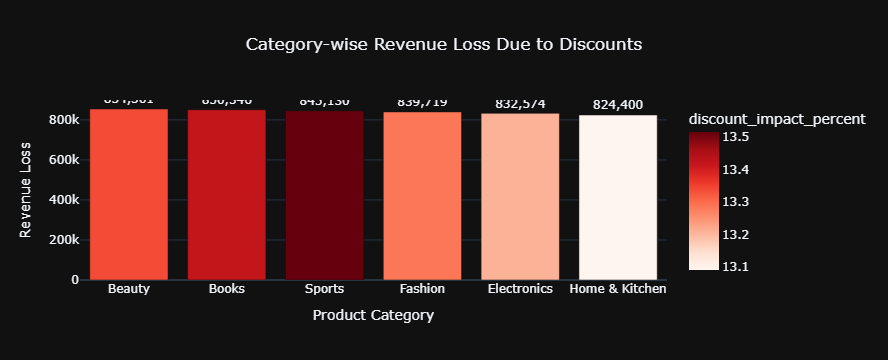

In [39]:
# Category wise revenue loss to discount
fig = px.bar(
    category_discount.sort_values('revenue_loss_todiscount', ascending=False),
    x='product_category',
    y='revenue_loss_todiscount',
    text='revenue_loss_todiscount',
    color='discount_impact_percent',
    color_continuous_scale='Reds',
    title="Category-wise Revenue Loss Due to Discounts"
)
#Taller bar = More revenue sacrificed
#Darker red = Higher % impact
fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    xaxis_title="Product Category",
    yaxis_title="Revenue Loss"
)

fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')

fig.show()

In [ ]:
Observation:
Sports category shows slightly significantly higher revenue loss due to discounting.


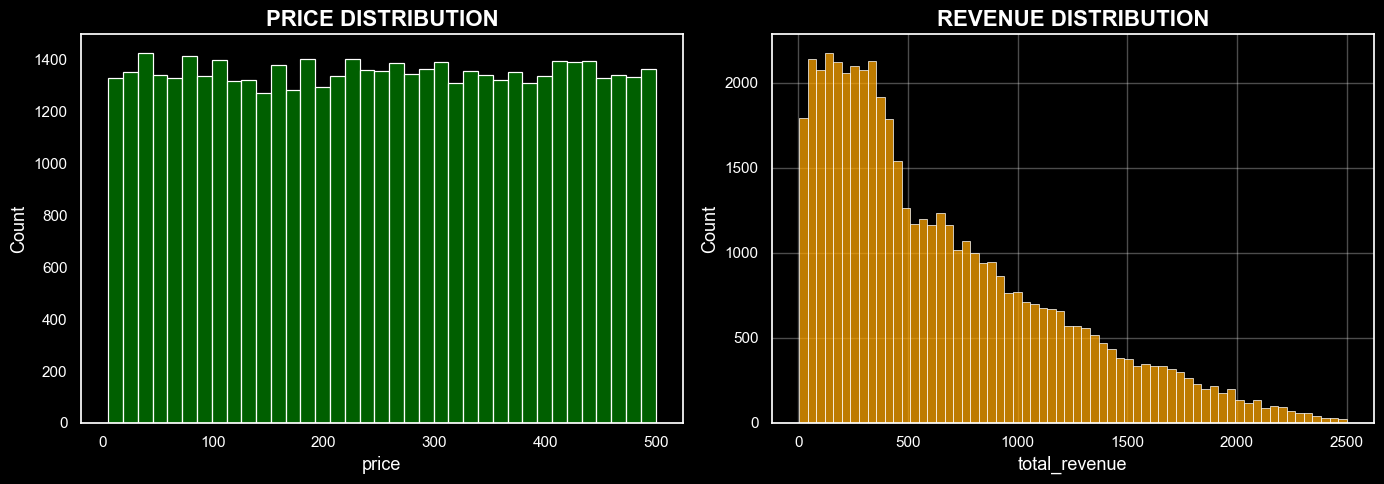

In [172]:
#Subplots

fid,axes=plt.subplots(1,2,figsize=(14,5))
sns.histplot(df['price'],ax=axes[0],color='green')
axes[0].set_title("PRICE DISTRIBUTION")

sns.histplot(df['total_revenue'],ax=axes[1],color='orange')
plt.grid(True)
axes[1].set_title("REVENUE DISTRIBUTION")

plt.tight_layout()
plt.show()

Observations:
Price histogram shows relatively uniform distibution
Revenue distribution appears postively skewed with few high value revenue 

### KEY INSIGHTS & BUSINEES MEANING

#### REVENUE PERFORMANCE INSIGHTS
     1) Revenue by Product category(Bar chart)
         Insight: Revenue is almost equally distributed across product categories
         Business meaning:The company has diversified product portfolio with no over-dependence on a single category
         
     2) Revenue by Region category(Pie chart)
         Insight: Revenue contribution across regions is nearly uniform
         Business meaning: The business has strong geographic diversification,reducing regional market risk
         
     3) Montly revenue trend(Line chart)
         Insight:Montly revenue fluctuates withouth a consistent upward or downward trend
         Business meaning:Revenue performance may be influenced by seasonality, promotions or market demand variations
         
     4) Revenue distribution(Histogram)
         Insight:Revenue shows a right skewed distribution
         Business meaning:A small number of high value transactions contribute significantly to overall revenue
         
     5) Correlation Analysis(Heatmap)
         Insight:strong positive correlation between price and revenue, moderate positivee correlation between quantity sold and revenue, weak negative coorelation between discount and revenue
         Business meaning:Revenue is driven more by pricing and sale volume than heavy discounting strategies

     6) Category-Wise Revenue Loss Due to Discount
        Insight:Certain categories show slightly higher revenue loss due to discounting
        Business meaning: A category-specific pricing strategy is required instead of uniform discounting

#### CUSTOMER BEHAVIOUR INSIGHTS
     1) Discount vs Quantity sold(Scatter plot)
           Insight:No strong relationship between discount percentage and quantity sold
           Business meaning:Customers are not higly infulenced by discounts in driving purchase quantity
           
     2) Review count vs Revenue(Scatter plot)
           Insight:No clear linear relationship between review count and revenue
           Business meaning:Higher review volume does not direcly translate into higher revenue generation
           
     3) Price distribution(Histogram)
           Insight:Price distribution is relatively uniformacross different ranges
           Business meaning:The company caters to multiple pricing segments,serving diverse customeer groups


# CONCLUSION
 * Revenue performance is stable and diversified across product categories and regions.
 * Pricing strategy plays a more significant role in revenue generation than discount strategies
 * Montly fluctions suggest potential seasonal demand patterns
 * A small number of high value transactions sigificantly impact total revenue
 * Customer purchasing behaviour appears less sensitive to discounts and review counts
 * Overall the business demonstrates balanced growth, diversified risk exposure and strategic pricing strength
     

